<a href="https://colab.research.google.com/github/GuilhermePelegrina/Mackenzie/blob/main/Aulas/2s2024/TIC/Exemplo_matriz_confusao_under_over_sampling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src='https://raw.githubusercontent.com/guilhermepelegrina/Mackenzie/main/logo_mackenzie.png'>


In [35]:
# Importando o conjunto de dados

import pandas as pd

df = pd.read_csv("https://raw.githubusercontent.com/guilhermepelegrina/Mackenzie/main/Datasets/data_bank_marketing.csv", sep = ';')
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [36]:
# Separando variáveis independentes das dependentes

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot       as plt

x = df[['age', 'balance', 'duration', 'previous']]
y = df['y']

# Separando em treino e Teste (30% para Teste)
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=4)

# Declarando o modelo
model = LogisticRegression()

# Treinando o modelo (com o conjunto de Treino)
model.fit(pd.DataFrame(X_train),y_train)

# Utilizando o modelo para prever novos casos
y_pred=model.predict(pd.DataFrame(X_test))

# Visualizando os resultados
cnf_matrix = confusion_matrix(y_test, y_pred)
print(cnf_matrix)
print('Classificados como compradores: ', (cnf_matrix[0][1] + cnf_matrix[1][1])/(cnf_matrix[0][0] + cnf_matrix[1][1] + cnf_matrix[0][1] + cnf_matrix[1][0]))

[[9881  171]
 [1023  228]]
Classificados como compradores:  0.03530036273555693


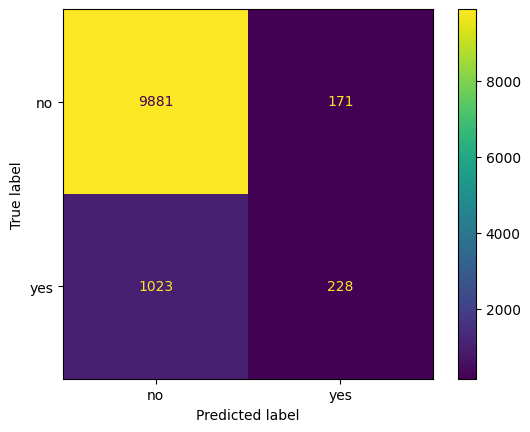

In [37]:
cnf_matrix = confusion_matrix(y_test, y_pred, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cnf_matrix, display_labels=model.classes_)

disp.plot()
plt.show()

In [38]:
# Visualizando os resultados
print('Acertos: ', (cnf_matrix[0][0] + cnf_matrix[1][1])/(cnf_matrix[0][0] + cnf_matrix[1][1] + cnf_matrix[0][1] + cnf_matrix[1][0]))

Acertos:  0.8943643280544988


In [39]:
# Undersampling

from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(random_state=42, sampling_strategy = 'majority') # Classe majoritária terá classes removidas

X_train_resampled, y_train_resampled = rus.fit_resample(X_train, y_train)

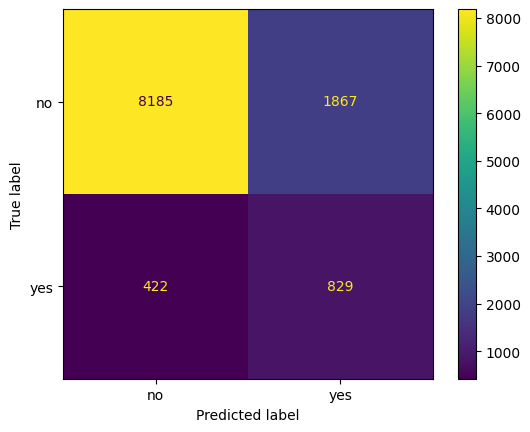

In [40]:
# Treinando o modelo (com o conjunto de Treino)
model.fit(pd.DataFrame(X_train_resampled),y_train_resampled)

# Utilizando o modelo para prever novos casos
y_pred=model.predict(pd.DataFrame(X_test))

# Visualizando os resultados
cnf_matrix = confusion_matrix(y_test, y_pred, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cnf_matrix, display_labels=model.classes_)

disp.plot()
plt.show()

In [41]:
# Visualizando os resultados
print('Acertos: ', (cnf_matrix[0][0] + cnf_matrix[1][1])/(cnf_matrix[0][0] + cnf_matrix[1][1] + cnf_matrix[0][1] + cnf_matrix[1][0]))

Acertos:  0.7974873927275944


In [42]:
# Oversampling

from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(random_state=42) # Seleciona amostras da classe minoritária com reposição

X_train_resampled, y_train_resampled = ros.fit_resample(X_train, y_train)

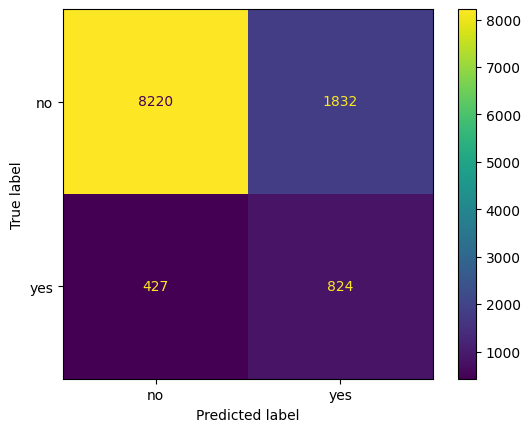

In [43]:
# Treinando o modelo (com o conjunto de Treino)
model.fit(pd.DataFrame(X_train_resampled),y_train_resampled)

# Utilizando o modelo para prever novos casos
y_pred=model.predict(pd.DataFrame(X_test))

# Visualizando os resultados
cnf_matrix = confusion_matrix(y_test, y_pred, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cnf_matrix, display_labels=model.classes_)

disp.plot()
plt.show()

In [44]:
# Visualizando os resultados
print('Acertos: ', (cnf_matrix[0][0] + cnf_matrix[1][1])/(cnf_matrix[0][0] + cnf_matrix[1][1] + cnf_matrix[0][1] + cnf_matrix[1][0]))

Acertos:  0.8001415553392904


In [45]:
# Oversampling - SMOTE

from imblearn.over_sampling import SMOTE

# criando uma instância do SMOTE
smote = SMOTE(k_neighbors=3)

# balanceando os dados (interpolação com os k vizinhos mais próximos)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

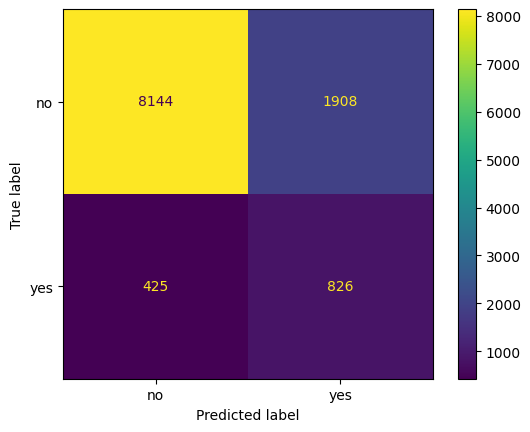

In [46]:
# Treinando o modelo (com o conjunto de Treino)
model.fit(pd.DataFrame(X_train_resampled),y_train_resampled)

# Utilizando o modelo para prever novos casos
y_pred=model.predict(pd.DataFrame(X_test))

# Visualizando os resultados
cnf_matrix = confusion_matrix(y_test, y_pred, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cnf_matrix, display_labels=model.classes_)

disp.plot()
plt.show()

In [47]:
# Visualizando os resultados
print('Acertos: ', (cnf_matrix[0][0] + cnf_matrix[1][1])/(cnf_matrix[0][0] + cnf_matrix[1][1] + cnf_matrix[0][1] + cnf_matrix[1][0]))

Acertos:  0.793594620897107
